# Julia's EDA

## Loading data

In [4]:
import pandas as pd
import json
import glob 

file_paths = glob.glob("../data/raw/1_csv/*csv")  
print(file_paths)
# data_path = "../data/raw/1_csv/data_subchunk_100000_200000.csv"

# Load data
# df = pd.read_csv(data_path)

df = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

df.info()

['../data/raw/1_csv/data_subchunk_800000_900000.csv', '../data/raw/1_csv/data_subchunk_100000_200000.csv', '../data/raw/1_csv/data_subchunk_400000_500000.csv', '../data/raw/1_csv/data_subchunk_700000_800000.csv', '../data/raw/1_csv/data_subchunk_200000_300000.csv', '../data/raw/1_csv/data_subchunk_600000_700000.csv', '../data/raw/1_csv/data_subchunk_300000_400000.csv', '../data/raw/1_csv/data_subchunk_0_100000.csv', '../data/raw/1_csv/data_subchunk_500000_600000.csv']


/tmp/ipykernel_1755041/2743034729.py:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883027 entries, 0 to 883026
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   $insert_id            883027 non-null  object
 1   amplitude_id          883027 non-null  int64 
 2   app                   883027 non-null  int64 
 3   city                  877732 non-null  object
 4   client_event_time     883027 non-null  object
 5   client_upload_time    883027 non-null  object
 6   country               883027 non-null  object
 7   data                  883027 non-null  object
 8   data_type             883027 non-null  object
 9   device_family         883027 non-null  object
 10  device_id             883027 non-null  object
 11  device_type           785324 non-null  object
 12  dma                   727872 non-null  object
 13  event_id              883027 non-null  int64 
 14  event_properties      883027 non-null  object
 15  event_time       

In [5]:
df.head()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,73cff931-9fca-4ee3-9126-f37a8c917872,857540480084,591532,Nashville,2024-05-29 13:07:39.043000,2024-05-29 13:07:42.146000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125.0.0.0,Web,2024-05-29 13:07:43.839000,Tennessee,2024-05-29 13:07:42.146000,2024-05-29 13:07:42.148000,1716987875858,9aecc15d-64a4-4190-80f5-b5b842422f2c,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",8e57c8bc-91ae-408d-b9d1-5a8b06c05d95
1,5c5a64ba-7a15-40db-bd01-48e697d92dce,857540480084,591532,Nashville,2024-05-29 13:07:40.583000,2024-05-29 13:07:42.146000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125.0.0.0,Web,2024-05-29 13:07:43.839000,Tennessee,2024-05-29 13:07:42.146000,2024-05-29 13:07:42.148000,1716987875858,9aecc15d-64a4-4190-80f5-b5b842422f2c,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",71d2161e-5d64-4292-9e04-e0b0d94a36e5
2,bfeff18d-113d-43c3-8dd5-ec524275aa6b,857540480084,591532,Nashville,2024-05-29 13:07:40.583000,2024-05-29 13:07:42.146000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125.0.0.0,Web,2024-05-29 13:07:43.839000,Tennessee,2024-05-29 13:07:42.146000,2024-05-29 13:07:42.148000,1716987875858,9aecc15d-64a4-4190-80f5-b5b842422f2c,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",43f83eff-1ce6-4b4c-b116-2be0843ebd5a
3,18a3d6f0-fe74-45e3-b11f-ba73036b7547,857540480084,591532,Nashville,2024-05-29 13:07:40.989000,2024-05-29 13:07:42.146000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125.0.0.0,Web,2024-05-29 13:07:43.839000,Tennessee,2024-05-29 13:07:42.146000,2024-05-29 13:07:42.148000,1716987875858,9aecc15d-64a4-4190-80f5-b5b842422f2c,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",773624ba-d044-425d-92aa-ecc777bf795d
4,573a32f3-96de-4910-a060-f6a6123df59d,857540480084,591532,Nashville,2024-05-29 13:07:40.992000,2024-05-29 13:07:42.146000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125.0.0.0,Web,2024-05-29 13:07:43.839000,Tennessee,2024-05-29 13:07:42.146000,2024-05-29 13:07:42.148000,1716987875858,9aecc15d-64a4-4190-80f5-b5b842422f2c,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",de9dadbb-d9d0-48e2-a6a9-64e980b8a5e2


In [6]:
df.columns

Index(['$insert_id', 'amplitude_id', 'app', 'city', 'client_event_time',
       'client_upload_time', 'country', 'data', 'data_type', 'device_family',
       'device_id', 'device_type', 'dma', 'event_id', 'event_properties',
       'event_time', 'event_type', 'language', 'library', 'os_name',
       'os_version', 'platform', 'processed_time', 'region',
       'server_received_time', 'server_upload_time', 'session_id', 'user_id',
       'user_properties', 'uuid'],
      dtype='object')

## Preprocessing/cleaning

In [7]:
# handle nested fields

import ast
# Convert stringified JSON fields to actual dictionaries
json_columns = ["event_properties", "user_properties", "data"]

for col in json_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x)  if isinstance(x, str) else {})

# Extract relevant keys into new columns
df["event_name"] = df["event_properties"].apply(lambda x: x.get("displayName", "Unknown"))
df["event_property_type"] = df["event_properties"].apply(lambda x: x.get("type", "Unknown"))
df["event_slug"] = df["event_properties"].apply(lambda x: x.get("slug", "Unknown"))
df["event_lob"] = df["event_properties"].apply(lambda x: x.get("line-of-business", "Unknown"))

df["user_role"] = df["user_properties"].apply(lambda x: x.get("roles", ["Unknown"])[0])
df["user_hostname"] = df["user_properties"].apply(lambda x: x.get("hostname", "Unknown"))
df.drop(columns=json_columns, inplace=True)


In [8]:
df = df.drop_duplicates()
print(df.isnull().sum())

$insert_id                   0
amplitude_id                 0
app                          0
city                      5295
client_event_time            0
client_upload_time           0
country                      0
data_type                    0
device_family                0
device_id                    0
device_type              97703
dma                     155155
event_id                     0
event_time                   0
event_type                   0
language                     0
library                      0
os_name                      0
os_version                   0
platform                     0
processed_time               0
region                     302
server_received_time         0
server_upload_time           0
session_id                   0
user_id                    591
uuid                         0
event_name                   0
event_property_type          0
event_slug                   0
event_lob                    0
user_role                    0
user_hos

In [9]:
# convert to datetime
time_columns = ["event_time", "client_event_time", "server_received_time"]

for col in time_columns:
    df[col] = pd.to_datetime(df[col])

# Extract time-based features
df["event_date"] = df["event_time"].dt.date
df["event_time_of_day"] = df["event_time"].dt.time
df["event_hour"] = df["event_time"].dt.hour
df["event_weekday"] = df["event_time"].dt.weekday

## Categorical data
I want to figure out what kind of entries are in the categorical columns. Plot some bar charts to see the distribution.

In [10]:
# Define the categorical columns to inspect
categorical_columns = ['event_name', 'event_type', 'event_slug', 'event_lob', 'event_property_type', 'user_hostname', 'user_role']

# Create a summary DataFrame
summary_df = pd.DataFrame(columns=['Total Entries', 'Non-Empty Entries', 'Empty Entries', 'Unique Categories'])

for col in categorical_columns:
    total_entries = df[col].shape[0]
    non_empty = df[col].notna().sum()
    empty = total_entries - non_empty
    unique_categories = df[col].nunique()

    summary_df.loc[col] = [total_entries, non_empty, empty, unique_categories]

summary_df

,Total Entries,Non-Empty Entries,Empty Entries,Unique Categories
event_name,883027,883027,0,350
event_type,883027,883027,0,395
event_slug,883027,883027,0,347
event_lob,883027,883027,0,38
event_property_type,883027,883027,0,4
user_hostname,883027,883027,0,17
user_role,883027,883027,0,15


In [11]:
df["user_id"]

0         9aecc15d-64a4-4190-80f5-b5b842422f2c
1         9aecc15d-64a4-4190-80f5-b5b842422f2c
2         9aecc15d-64a4-4190-80f5-b5b842422f2c
3         9aecc15d-64a4-4190-80f5-b5b842422f2c
4         9aecc15d-64a4-4190-80f5-b5b842422f2c
                          ...                 
883022    777875fc-c47c-4b64-985c-5fe344c1194f
883023    1f8b074f-2d01-46fc-a7a6-aa3a39446a9c
883024    b7f93339-131b-46f7-8981-3d01ff5dd815
883025    1f8b074f-2d01-46fc-a7a6-aa3a39446a9c
883026    777875fc-c47c-4b64-985c-5fe344c1194f
Name: user_id, Length: 883027, dtype: object

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


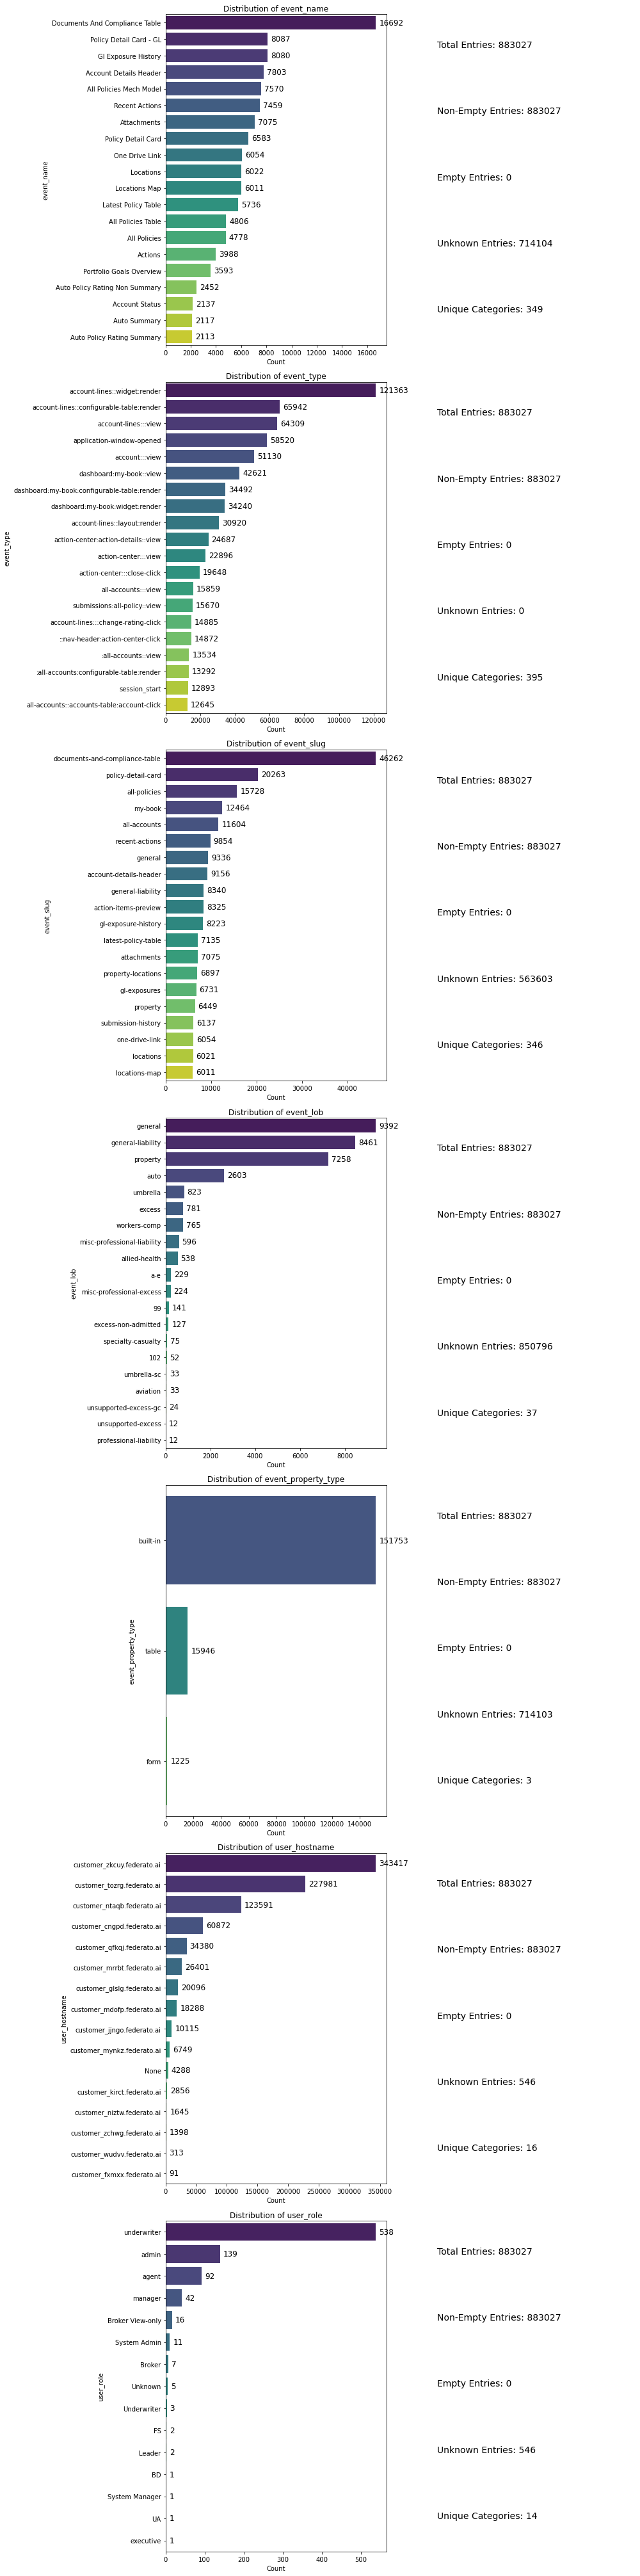

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(14, len(categorical_columns) * 8))

# Loop through each column
for idx, col in enumerate(categorical_columns):
    filtered_col = df[df[col] != 'Unknown'] # ignore 'Unkown' entries
    
    # Count the number of unique categories and their frequencies
    category_counts = filtered_col[col].value_counts(dropna=False)

    # Number of unique categories
    unique_categories = category_counts.index.tolist()
    

    # Limit to top 20 categories if there are more than 20
    top_categories = category_counts.head(20)

    if (col == 'user_role'):
        top_categories = df.groupby("user_role")["user_id"].nunique().head(20).sort_values(ascending=False)

    # Number of non-empty and empty entries
    total_entries = len(df[col])
    non_empty_entries = total_entries - category_counts.isnull().sum()
    empty_entries = category_counts.isnull().sum()
    unknown_entries = df[col].eq('Unknown').sum()

    # Plot bar chart for the categorical column (top 20 categories)
    barplot = sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, ax=axes[idx, 0], palette="viridis")
    axes[idx, 0].set_title(f"Distribution of {col}")
    axes[idx, 0].set_xlabel("Count")
    axes[idx, 0].set_ylabel(col)

    for bar in barplot.containers:
        axes[idx, 0].bar_label(bar, fmt='%d', label_type='edge', padding=5, fontsize=12)

    # Plot supporting information as text
    axes[idx, 1].axis('off')  # Turn off axes for the second plot
    axes[idx, 1].text(0.1, 0.9, f"Total Entries: {total_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.7, f"Non-Empty Entries: {non_empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.5, f"Empty Entries: {empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.3, f"Unknown Entries: {unknown_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.1, f"Unique Categories: {len(unique_categories)}", fontsize=14, ha='left')

# Show the plot
plt.tight_layout()
plt.show()


Note that for event_name, event_slug, and event_property_type a lot of the entries are 'Unknown'

## Daily Active Users

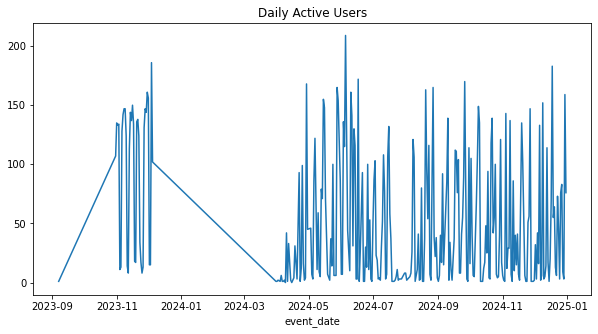

In [13]:
dau = df.groupby("event_date")["user_id"].nunique() # number of unique user ids per day

# Plot DAU
import matplotlib.pyplot as plt
dau.plot(title="Daily Active Users", figsize=(10, 5))
plt.show()


why are there random gaps...

In [14]:
date_range = (df["event_date"].min(), df["event_date"].max())
print("date range: ", date_range)
n_unique_dates = df["event_date"].nunique()
print("number of unique dates:", n_unique_dates)

date range:  (datetime.date(2023, 9, 7), datetime.date(2024, 12, 31))
number of unique dates: 292


## User Retention

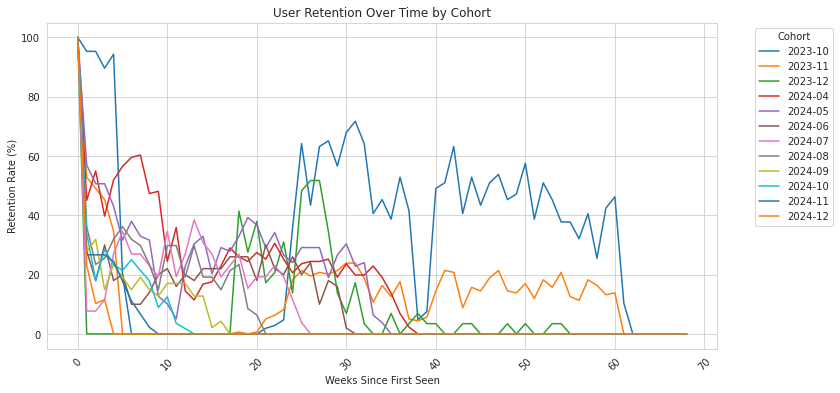

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the first time each user appeared
df["first_seen"] = df.groupby("user_id")["event_time"].transform("min") # Finds the earliest event_time for each user and applies it to all rows for that user

# Assign each user to a cohort (signup month)
df["cohort"] = df["first_seen"].dt.to_period("M")  # Group by month
df["days_since_first_seen"] = (df["event_time"] - df["first_seen"]).dt.days
df["weeks_since_first_seen"] = df["days_since_first_seen"] // 7

retention = df.groupby(["cohort", "weeks_since_first_seen"])["user_id"].nunique().unstack(fill_value=0)

# Normalize by cohort size (convert to retention %)
cohort_sizes = retention.iloc[:, 0]  # First column is cohort size at Day 0
retention_rate = retention.div(cohort_sizes, axis=0) * 100  # Convert to percentage

# Step 5: Plot Retention Chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for cohort in retention_rate.loc[cohort_sizes[cohort_sizes >= 20].index].index: # filter out the cohort if it has less than 20 users
    plt.plot(retention_rate.columns.to_numpy(), retention_rate.loc[cohort].to_numpy(), label=str(cohort))

plt.xlabel("Weeks Since First Seen")
plt.ylabel("Retention Rate (%)")
plt.title("User Retention Over Time by Cohort")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()


In [44]:
df["months_since_first_seen"] = ((df["event_time"].dt.year - df["first_seen"].dt.year) * 12 +
                                   (df["event_time"].dt.month - df["first_seen"].dt.month))
df["months_since_first_seen"]
retention = df.groupby(["cohort", "months_since_first_seen"])["user_id"].nunique().unstack(fill_value=0)

# Normalize by cohort size (convert to retention %)
cohort_sizes = retention.iloc[:, 0]  # First column is cohort size at Day 0
print("cohort sizes:", cohort_sizes)
retention_rate = retention.div(cohort_sizes, axis=0) * 100  # Convert to percentage
retention_rate

cohort sizes: cohort
2023-09      1
2023-10    106
2023-11    159
2023-12     29
2024-04    131
2024-05     79
2024-06     50
2024-07     26
2024-08     47
2024-09     47
2024-10     56
2024-11     45
2024-12     78
Freq: M, Name: 0.0, dtype: int64


months_since_first_seen,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
cohort,,,,,,,,,,,,,,,,
2023-09,100.0,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
2023-10,100.0,100.000000,92.452830,0.000000,0.000000,0.943396,73.584906,77.358491,75.471698,65.094340,67.924528,67.924528,63.207547,59.433962,59.433962,0.0
2023-11,100.0,52.201258,0.000000,0.000000,0.000000,32.075472,38.364780,41.509434,28.301887,31.446541,30.188679,26.415094,26.415094,28.930818,0.000000,0.0
2023-12,100.0,0.000000,0.000000,0.000000,65.517241,58.620690,75.862069,20.689655,10.344828,6.896552,3.448276,6.896552,3.448276,0.000000,0.000000,0.0
2024-04,100.0,77.099237,80.152672,49.618321,39.694656,35.114504,34.351145,32.824427,32.061069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-05,100.0,73.417722,56.962025,44.303797,51.898734,45.569620,44.303797,40.506329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-06,100.0,40.000000,32.000000,28.000000,36.000000,34.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-07,100.0,50.000000,46.153846,42.307692,34.615385,34.615385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-08,100.0,55.319149,38.297872,44.680851,38.297872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


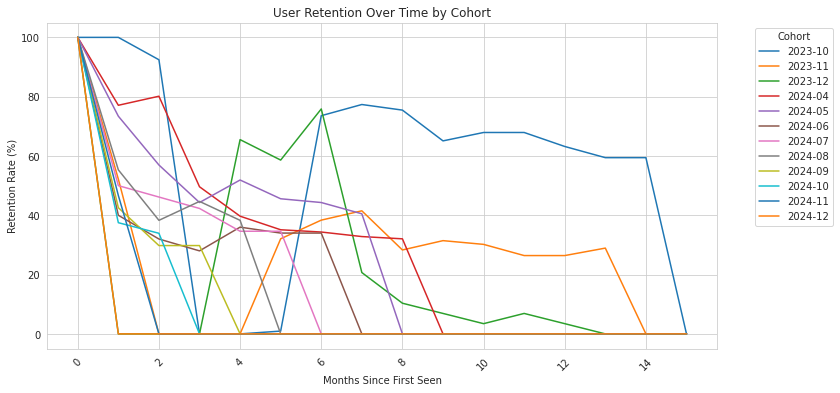

In [ ]:

# Plot Retention Chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for cohort in retention_rate.loc[cohort_sizes[cohort_sizes >= 20].index].index: # filter out the cohort if it has less than 20 users
    plt.plot(retention_rate.columns.to_numpy(), retention_rate.loc[cohort].to_numpy(), label=str(cohort))

plt.xlabel("Months Since First Seen")
plt.ylabel("Retention Rate (%)")
plt.title("User Retention Over Time by Cohort")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

## Session lengths

In [50]:
sessions = df.groupby("session_id")["event_time"].agg(["min", "max"])
sessions["session_length"] = (sessions["max"] - sessions["min"]).dt.total_seconds()

sessions


,min,max,session_length
session_id,,,
1694059506102,2023-09-07 04:05:10.670,2023-09-07 04:05:11.260,0.590
1698714865226,2023-10-31 02:02:55.714,2023-10-31 02:10:08.679,432.965
1698715645364,2023-10-31 02:02:54.236,2023-10-31 02:03:17.944,23.708
1698717947091,2023-10-31 02:05:49.724,2023-10-31 02:49:21.280,2611.556
1698720146128,2023-10-31 02:42:26.129,2023-10-31 02:43:48.796,82.667
...,...,...,...
1735653407838,2024-12-31 13:56:47.838,2024-12-31 13:56:47.839,0.001
1735653409277,2024-12-31 13:56:49.277,2024-12-31 13:59:43.593,174.316
1735653435426,2024-12-31 13:57:15.426,2024-12-31 13:57:15.427,0.001


In [51]:
df["session_length"] = df["session_id"].map(sessions["session_length"])
df["session_length"]

0          1185.173
1          1185.173
2          1185.173
3          1185.173
4          1185.173
            ...    
883022      846.785
883023     2243.191
883024    15278.903
883025     2243.191
883026      846.785
Name: session_length, Length: 883027, dtype: float64

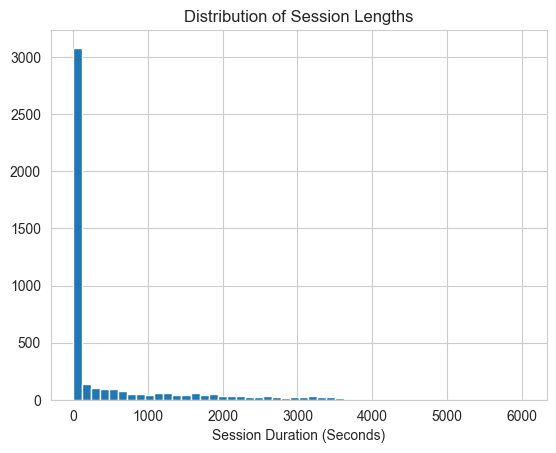

In [16]:
import matplotlib.pyplot as plt

# Plot histogram of session lengths
sessions["session_length"].hist(bins=50)
plt.title("Distribution of Session Lengths")
plt.xlabel("Session Duration (Seconds)")
plt.show()

why are there so many short sessions

In [52]:
sessions["session_length"].describe()


count    51962.000000
mean       640.786246
std       1661.010771
min          0.000000
25%          0.001000
50%          5.183000
75%        542.710750
max      68215.038000
Name: session_length, dtype: float64

In [53]:
# Create a sequence of actions for each session
event_sequences = df.groupby('session_id')['event_type'].apply('->'.join).reset_index()
sessions = pd.merge(sessions, event_sequences, on='session_id', how='left') # rename the column to event_sequence
sessions.rename(columns={"event_type": "event_sequence"}, inplace=True)
sessions


,session_id,min,max,session_length,event_sequence
0,1694059506102,2023-09-07 04:05:10.670,2023-09-07 04:05:11.260,0.590,application-window-opened->dashboard:my-book::...
1,1698714865226,2023-10-31 02:02:55.714,2023-10-31 02:10:08.679,432.965,all-accounts:::view->all-accounts::accounts-ta...
2,1698715645364,2023-10-31 02:02:54.236,2023-10-31 02:03:17.944,23.708,application-window-opened->dashboard:my-book::...
3,1698717947091,2023-10-31 02:05:49.724,2023-10-31 02:49:21.280,2611.556,application-window-opened->dashboard:my-book::...
4,1698720146128,2023-10-31 02:42:26.129,2023-10-31 02:43:48.796,82.667,dashboard:my-book:recent-actions-table:account...
...,...,...,...,...,...
51957,1735653407838,2024-12-31 13:56:47.838,2024-12-31 13:56:47.839,0.001,session_start->session_end
51958,1735653409277,2024-12-31 13:56:49.277,2024-12-31 13:59:43.593,174.316,session_start->::nav-header:action-center-clic...
51959,1735653435426,2024-12-31 13:57:15.426,2024-12-31 13:57:15.427,0.001,session_start->session_end
51960,1735653435427,2024-12-31 13:57:12.981,2024-12-31 13:57:32.071,19.090,application-window-opened->dashboard:my-book::...


In [65]:
# Find common sequences that lead to long sessions, >= 10 min. This is a bit above the 75% of session lengths.
long_sessions = sessions[sessions["session_length"] >= 600]
long_sessions["event_sequence"].value_counts().head(15)

event_sequence
application-window-opened->dashboard:my-book::view->application-window-opened->dashboard:my-book::view                                                                                                                                                                                                                 44
session_end->session_end                                                                                                                                                                                                                                                                                               31
application-window-opened->application-window-opened                                                                                                                                                                                                                                                                   27
all-accounts:::view->all-accounts::accounts

In [74]:
long_sessions["event_sequence"].value_counts().head(15).index

Index(['application-window-opened->dashboard:my-book::view->application-window-opened->dashboard:my-book::view',
       'session_end->session_end',
       'application-window-opened->application-window-opened',
       'all-accounts:::view->all-accounts::accounts-table:account-click->account:::view->account-lines:::view->all-accounts:::view->all-accounts::accounts-table:account-click->account:::view->account-lines:::view',
       'application-window-opened->dashboard:my-book::view->application-window-opened->dashboard:my-book::view->application-window-opened->dashboard:my-book::view',
       'dashboard:my-book::view->dashboard:my-book::view',
       'all-accounts:::view->all-accounts::accounts-table:account-click->account-lines:::view->account:::view->all-accounts:::view->all-accounts::accounts-table:account-click->account-lines:::view->account:::view',
       'application-window-opened->account:::view->account-lines:::view->application-window-opened->account:::view->account-lines:::vie

In [76]:
for session_name in long_sessions["event_sequence"].value_counts().head(15).index:
    print("\n\n",session_name)
    print(long_sessions[long_sessions["event_sequence"] == session_name].describe())



 application-window-opened->dashboard:my-book::view->application-window-opened->dashboard:my-book::view
         session_id                            min  \
count  4.400000e+01                             44   
mean   1.701741e+12  2023-12-05 01:45:10.231340800   
min    1.698843e+12     2023-11-01 12:43:53.792000   
25%    1.699457e+12  2023-11-08 15:30:58.552750080   
50%    1.700175e+12  2023-11-16 22:53:18.216499968   
75%    1.701523e+12  2023-12-02 13:20:00.252499968   
max    1.718187e+12     2024-06-12 10:01:47.225000   
std    4.860645e+09                            NaN   

                                 max  session_length  
count                             44       44.000000  
mean   2023-12-05 02:06:07.951409152     1257.720068  
min       2023-11-01 13:08:44.134000      617.290000  
25%    2023-11-08 15:45:51.419749888      946.833750  
50%    2023-11-16 23:26:56.149499904     1178.413500  
75%    2023-12-02 13:47:57.505999872     1513.881500  
max       2024-06-12 1

/tmp/ipykernel_1755041/3654486864.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sessions["event_num"] = filtered_sessions["event_sequence"].map(event_mapping)
/tmp/ipykernel_1755041/3654486864.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=filtered_sessions, x="event_num", y="session_length", palette="coolwarm", width=0.6)


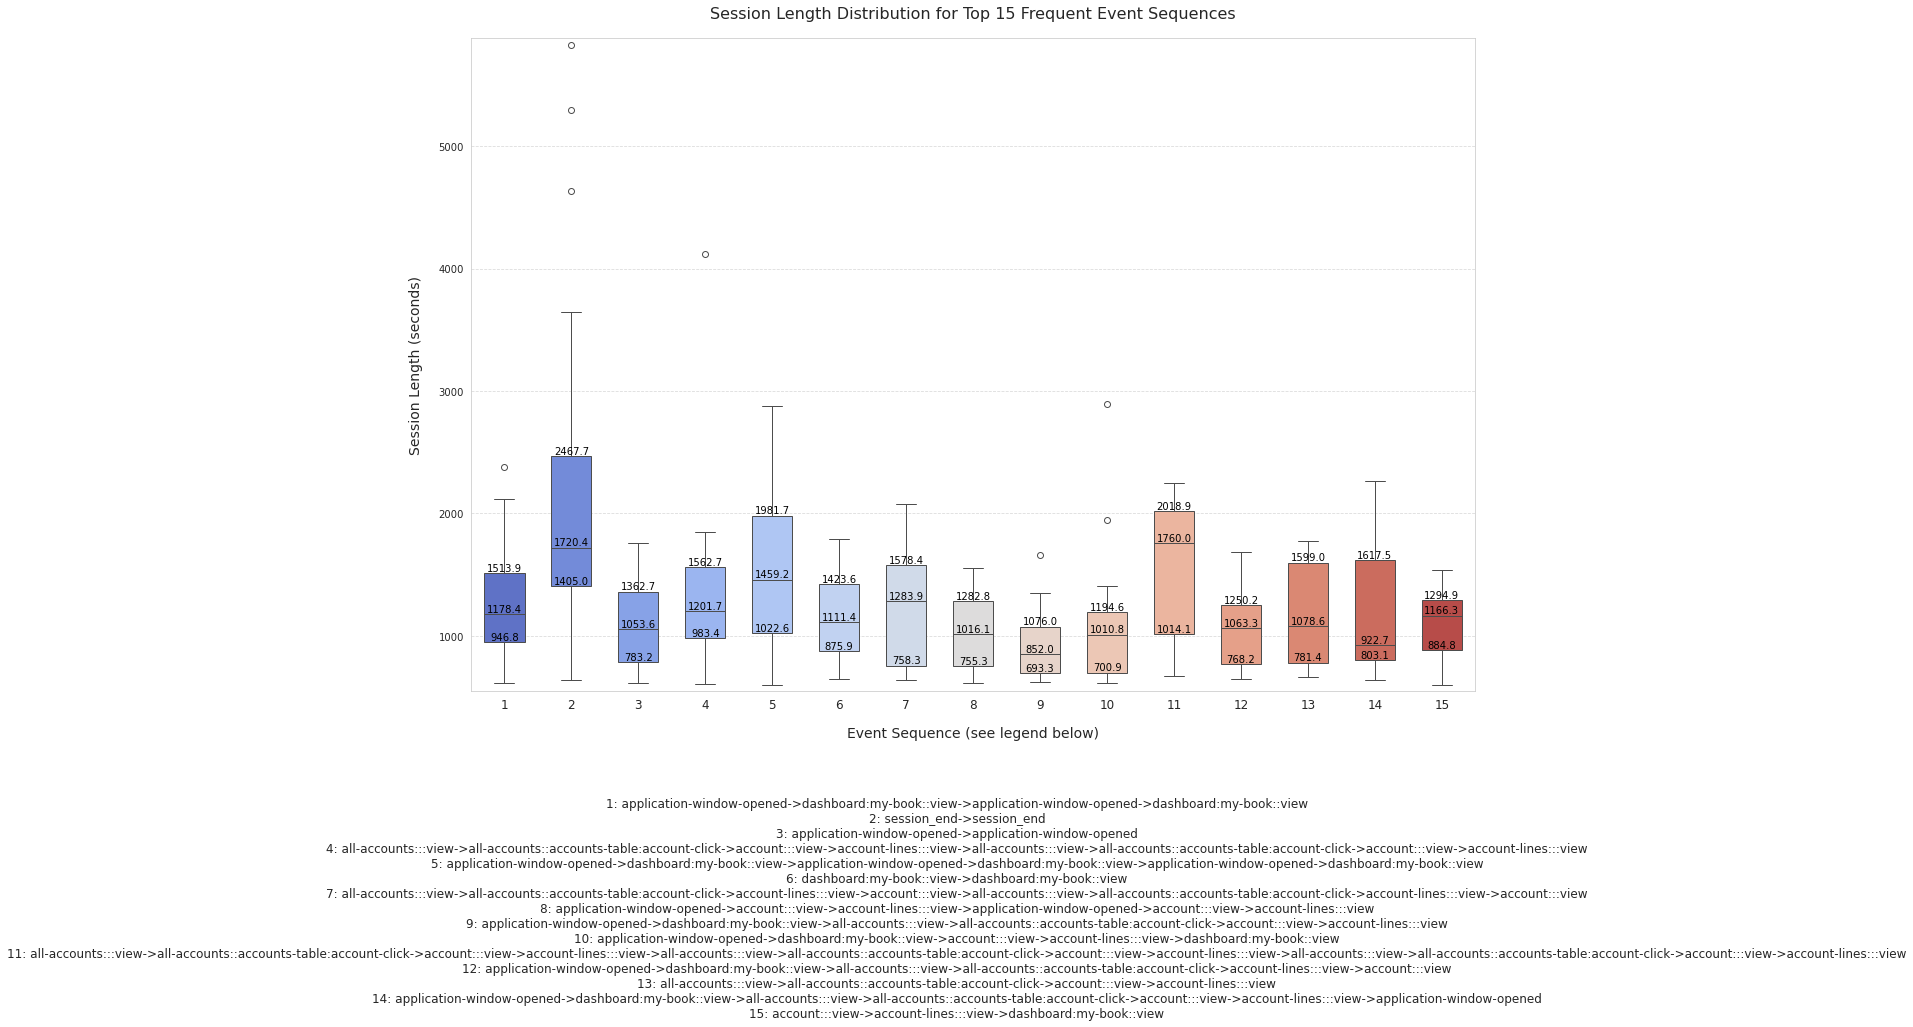

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the top 15 most common event sequences
top_15_sequences = long_sessions["event_sequence"].value_counts().head(15).index

# Filter long_sessions to keep only these sequences
filtered_sessions = long_sessions[long_sessions["event_sequence"].isin(top_15_sequences)]

# Map event sequences to numbers for x-axis
event_mapping = {event: idx for idx, event in enumerate(top_15_sequences)}
filtered_sessions["event_num"] = filtered_sessions["event_sequence"].map(event_mapping)

# Set figure size (increase width and height)
plt.figure(figsize=(18, 12))  # Wider (18), Taller (10)

# Create box plot
ax = sns.boxplot(data=filtered_sessions, x="event_num", y="session_length", palette="coolwarm", width=0.6)

# Label quartiles directly on the chart
for idx, event in enumerate(top_15_sequences):
    subset = filtered_sessions[filtered_sessions["event_sequence"] == event]["session_length"]
    
    if subset.empty:
        continue
    
    q1 = subset.quantile(0.25)
    median = subset.median()
    q3 = subset.quantile(0.75)

    # Plot text on the chart
    ax.text(idx, q1, f"{q1:.1f}", ha='center', va='bottom', fontsize=10, color='black',)
    ax.text(idx, median, f"{median:.1f}", ha='center', va='bottom', fontsize=10, color='black')
    ax.text(idx, q3, f"{q3:.1f}", ha='center', va='bottom', fontsize=10, color='black')

# Update x-axis labels to numbers with larger spacing
plt.xticks(ticks=np.arange(len(top_15_sequences)), labels=np.arange(1, len(top_15_sequences) + 1), fontsize=12)

# Increase space between x-axis labels and plot
plt.xlabel("Event Sequence (see legend below)", fontsize=14, labelpad=15)
plt.ylabel("Session Length (seconds)", fontsize=14, labelpad=15)
plt.title("Session Length Distribution for Top 15 Frequent Event Sequences", fontsize=16, pad=20)

# Increase y-axis range to give more vertical space
plt.ylim(filtered_sessions["session_length"].min() - 50, filtered_sessions["session_length"].max() + 50)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Create legend with actual event names below the chart
legend_labels = [f"{idx + 1}: {event}" for idx, event in enumerate(top_15_sequences)]
plt.figtext(0.5, -0.25, "\n".join(legend_labels), wrap=True, ha="center", fontsize=12)

# Show plot
plt.show()


## Devices and OS

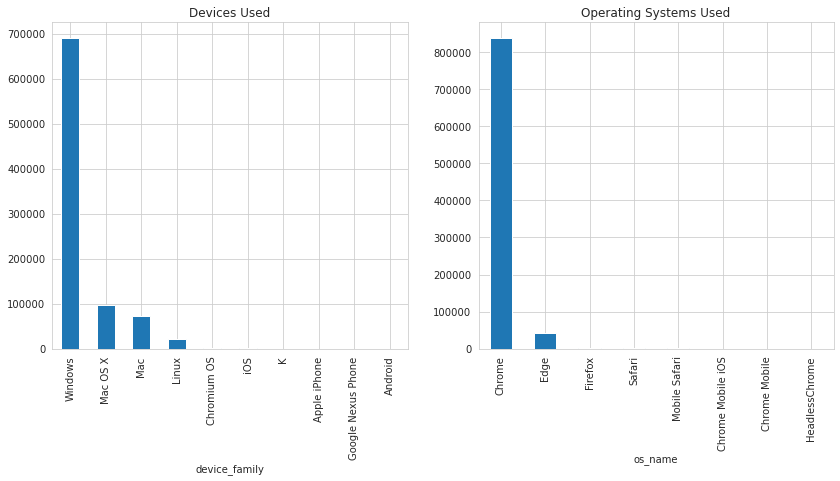

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df["device_family"].value_counts().plot(kind="bar", title="Devices Used", ax=axes[0])
df["os_name"].value_counts().plot(kind="bar", title="Operating Systems Used", ax=axes[1])
plt.show()
